# TP3 : Convergences et génération des lois de probabilités
### Auteur : ARGUELLO Camilo

### Introduction

L'objectif de ce TP est de étudier la génération des lois de probabilités en estimant leur moyenne et variance. Nous allons générer dans un premier temps la loi exponentielle à partir de la loi uniforme.

Ensuite nous allons étudier la loi de probabilité pour le comptage d'un nombre d'événement dans un intervalle de temps. Finalement nous allons étudier la planche de Galton et son application à la loi de probabilité.

comme par exemple à partir d'une loi uniforme pouvoir générer une loi exponentielle. Nous allons aussi étudier la mesure de loi de probabilité pour le comptage d'un nombre d'événement dans un intervalle de temps. Finalement nous allons étudier la planche de Galton et son application à la loi de probabilité.


In [207]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import factorial
from scipy.stats import poisson

## Génération d'une loi exponentielle à partir d'une loi uniforme

Dans cette première partie, nous allons créer un générateur aléatorie de nombres suivant une loi exponentielle à partir de la méthode de la transformation inverse. 

Pour obtenir un générateur de nombres suivant une loi de probabilité $g$, il faut connaitre sa fonction cumulative $G$ et trouver son inverse $G^{-1}$.

On considère la fonction de densité de probabilité $g(t)$ définit comme:

$$ g(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}} $$

Si on sait que:

$$ g(t) = \frac{d G(t)}{dt} $$

On peut montrer que la fonction cumulative de cette densité est :

$$ G(t) = \int_{0}^{t} g(t) dt $$

$$ G(t) = \int_{0}^{t} \frac{1}{\tau} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \frac{1}{\tau} \int_{0}^{t} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \left[ -e^{-\frac{t}{\tau}} \right]_{0}^{t} $$

$$ G(t) = 1 - e^{-\frac{t}{\tau}} $$

Alors, notre première objectif est de vérifier que la fonction 

$$ h (x) = -\tau \ ln(1-t) $$

est bien la fonction inverse de la fonction cumulative $G(t)$. Nous pouvons vérifier cela en calculant les fonctions composées $h(G(t))$ et $G(h(t))$.

$$ G(h(t)) = 1 - e^{\frac{\tau \ ln(1-t)}{\tau}} = 1 - (1 - t) = t $$

Ainsi que:

$$ h(G(t)) = -\tau \ ln(1 - \left( 1 - e^{-\frac{t}{\tau}} \right)) = t $$

Donc, la fonction $h$ est bien l'inverse de la fonction cumulative $G$. On peut donc simuler une loi exponentielle en appliquant la fonction $h$ aux valeurs générées par la loi uniforme dans l'intervalle $[0,1]$. Pour cela on définit des fonctions lambda $f(N)$, $g(t)$, $G(t)$ et $h(x)$.

In [36]:
# Fonction de densité de probabilité
g = lambda t, T=0.2 : (1/T) * np.exp(-t / T)

# Fonction cumulative de la densité
G = lambda t, T=0.2 : 1 - np.exp(-t / T)

# Fonction inverse de la fonction cumulative
h = lambda x, T=0.2 : -T * np.log(1 - x)

# Fonction pour générer un tableau de N valeurs aléatoires
f = lambda N : [random.random() for i in range(N)]

On choisit $\tau = 0.2s$ et on génère $10000$ nombres aléatoires en utilisant les fonctions qu'on vient de définir. Ainsi, on représente l'histogramme des valeurs générées. On s'attend à ce que l'histogramme suive une loi exponentielle décroissante de densité $g(t)$, avec une valeur moyenne attendue de $\mu = \frac{1}{1 / \tau} = 0.2 s$. On prendra 2 chiffres significatifs.

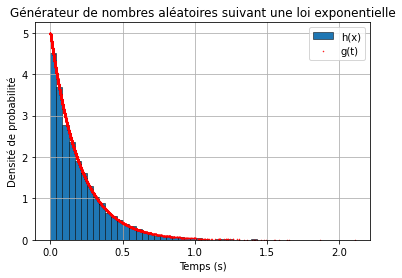

Valeur moyenne obtenue: 0.20 s


In [89]:
N=int(1e4)
T=0.2 # s

h_x = [h(i) for i in f(N)] # F_inf
g_x = [g(i) for i in h_x] # f

n,bins,patches = plt.hist(h_x, bins=50, density=True, label='h(x)', ec='black', linewidth=0.5)
plt.plot(h_x,g_x,'r.',markersize=1, label='g(t)')
plt.title('Générateur de nombres aléatoires suivant une loi exponentielle')
plt.xlabel('Temps (s)')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid()
plt.show()

print('Valeur moyenne obtenue: {:.2f} s'.format(np.mean(h_x)))

On constate qu'on obtient bien un modèle exponentielle pour la distribution des valeurs générées. On peut vérifier que la moyenne des valeurs générées est égale à la valeur attendue de $\mu = 0.2 s$.
**De même, on peut vérifier que l'option `density = True` de la fonction `hist` permet de normaliser l'histogramme pour qu'il représente une densité de probabilité**.

## Mesure d'un taux de comptage

Dans cette partie, on souhaite étudier la loi de Poisson, qui est une loi de probabilité discrète qui exprime la probabilité d'un nombre donné d'événements se produisant dans un intervalle fixe de temps. Elle est définie par un paramètre $\lambda$ qui est le taux de comptage moyen.

$$ P(k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$

En considérant le temps, on commence par créer une fonction qui calcule le temps de chaque évènement à partir d'une liste d'intervalles de temps. En suite, on peut appliquer cette fonction contenant $100000$ intevalles de temps générés grâce à notre fonction $g(t,T)$ définie précédemment. On tracera la distribution des temps des évènements.

In [76]:
# Fonction pour calculer la somme cumulée des temps suivant une loi exponentielle
def calculate_temps (t):
  return np.cumsum(np.insert(t, 0, 0))

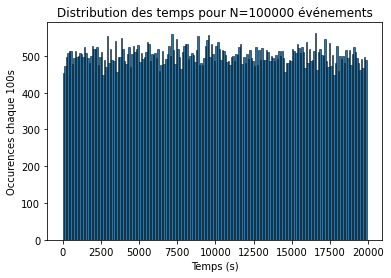

In [97]:
N = int(1e5)
h_x = [h(i) for i in f(N)]
x = calculate_temps(h_x)

plt.hist(x, bins=np.arange(0, 20000, 100), ec="black", linewidth=0.5)
plt.title("Distribution des temps pour N=" + str(N) + " événements")
plt.xlabel("Temps (s)")
plt.ylabel("Occurences chaque 100s")
plt.show()

Maintenant on peut compter le nombre d'événements par seconde et voir la distribution de valeurs. Pour cela, on crée une fonction ayant comme paramètres le tableau des temps et un intervalle de temps $dt=1s$. L'objectif est de retourenr le nombre d'évènements par seconde pour chaque seconde.

In [164]:
def count_events(times, dt=1):
    # Create an array of time intervals
    intervals = np.arange(np.floor(np.min(times)), np.ceil(np.max(times))+1, dt)

    # Count the number of events in each interval
    event_counts = np.histogram(times, bins=intervals)[0]

    return event_counts

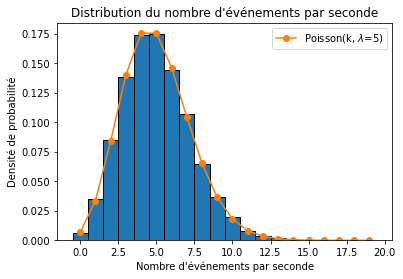

In [245]:
event_time = count_events(calculate_temps(h_x), 1)

ks = [k for k in range(0,20)]
mu = 1/T

plt.hist(event_time,bins=np.arange(-0.5, 20, 1), ec="black", density = True)
plt.plot(ks,poisson.pmf(ks, 1/T),"-",marker="o",label="Poisson(k, $\lambda$="+str(int(mu))+")")
plt.title("Distribution du nombre d'événements par seconde")
plt.xlabel("Nombre d'événements par seconde")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()


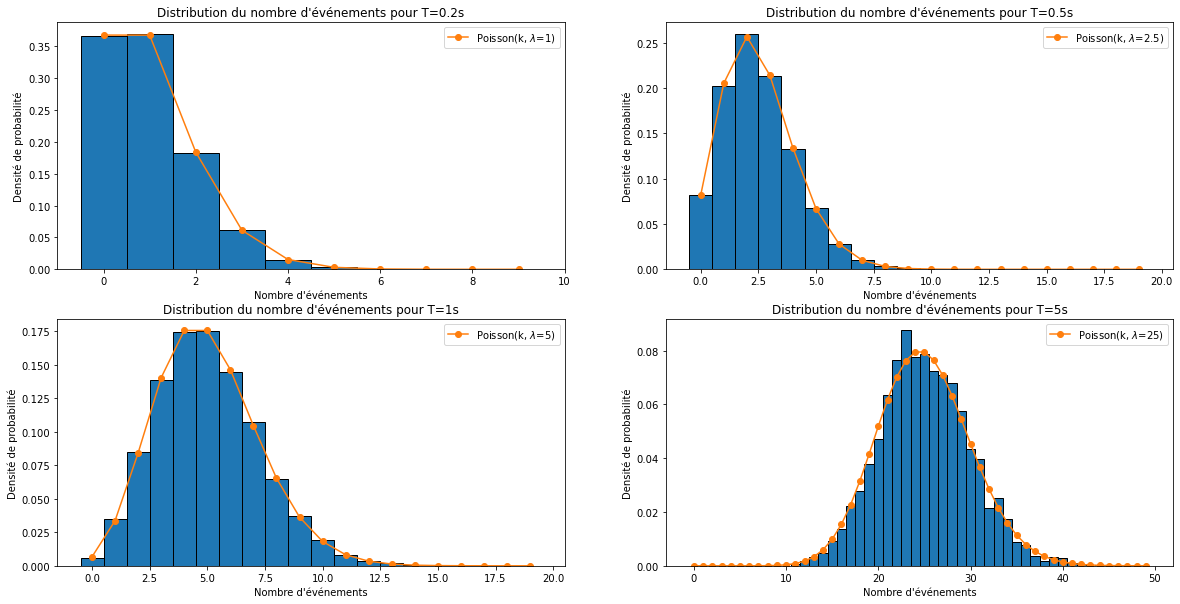

In [252]:
N = 10
Ts = [0.2, 0.5, 1, 5] # liste de temps
bins_numbers = [10, 20, 20, 50] # nombre de bins
lambdas = [1,2.5,5,25] # liste de lambdas or mu_s

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
  event_times = count_events(calculate_temps(h_x), Ts[i])
  ax.hist(event_times, bins=np.arange(-0.5, bins_numbers[i], 1), ec="black", density = True)
  
  mu = lambdas[i]
  ks = [k for k in range(0,bins_numbers[i])]
  ax.plot(ks,poisson.pmf(ks, mu),"-",marker="o",label="Poisson(k, $\lambda$="+str(mu)+")")
  
  ax.set_title('Distribution du nombre d\'événements pour T='+str(Ts[i])+'s')
  ax.set_ylabel('Densité de probabilité')
  ax.set_xlabel('Nombre d\'événements')
  ax.legend()
plt.show()

In [103]:
# Fonction pour générer un tableau de N valeurs aléatoires
calculate_event_times = lambda temps, T : [np.random.exponential(scale=G(t, T)) for t in temps]

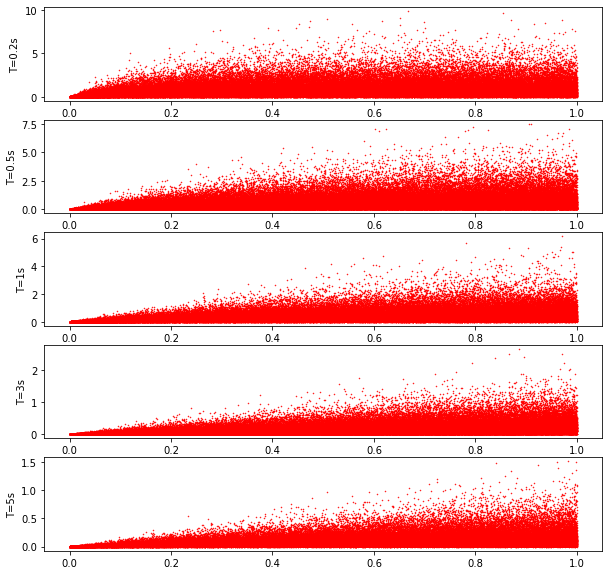

In [95]:
N = 100000
Ts = [0.2, 0.5, 1, 3, 5] # liste de temps

fig, axes = plt.subplots(len(Ts), 1, figsize=(10, 10))

for i,ax in enumerate(axes):
  times = f(N)
  event_times = calculate_event_times(times, Ts[i])
  ax.plot(times,event_times,'r.',markersize=1)
  #ax.set_ylim([0, 5])
  ax.set_ylabel('T='+str(Ts[i])+'s')
plt.show()

## Planche de Galton

Dans cette dernière partie, on étudie la distribution de billes lorsqu'elles traversent $n$ couches de clous et qu'elles se répartissent dans $n+1$ cases.

### Questions préparatoires

*Dans une panche de Galton avec n couches de clous, quelles sont les positions extrêmes que pourra prendre la bille ?*

Dans une planche de Galton avec $n$ couches de clous, les positions extrêmes que pourra prendre la bille sont $-n$ à gauche et $+n$ à droite, pour $n+1$ cases.

*Quelle est la loi de probabilité associé avec la direction de la bille après collision ?*

Au moment que la bille arrive à un clou, elle peut tomber à gauche ou à droite avec une probabilité de $0.5$ pour chaque direction. Ainsi, la direction de la bille après collision suit une loi de probabilité binomiale.

### Simulation numérique d’une planche de Galton

On commence par créer une fonction qui permet de générer une variable aleatoire X dans l'intervalle $[0,1]$ avec $p(X=0)=p(X=1)=\frac{1}{2}$.

In [23]:
def X():
  return random.randint(0, 1)

print('Exemple d\'une valeur produite par X entre 0 et 1: ',[X() for i in range(10)])

Exemple d'une valeur produite par X entre 0 et 1:  [0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


In [29]:
def simulate_collision(x=None):
  if x == None:
    x = 0
  """Simule le déplacement d'une bille en ajoutant ±1 à sa position de façon aléatoire."""
  movement = X() * 2 - 1 # Génère -1 ou 1 aléatoirement
  return x + movement

def simulate_position(n):
  """Simule la position de la bille après n couches de clous."""
  position = 0
  for i in range(n):
    position = simulate_collision(position)
  return position

In [34]:
print(simulate_position(45))

-15


In [ ]:
def generate_random_variable():
  """Génère une variable aléatoire X dans [0, 1] avec p(X = 0) = p(X = 1) = 1/2."""
  return random.choice([0, 1])

def simulate_bead_movement(position=None):
  if position == None:
    position = 0;
  """Simule le déplacement d'une bille en ajoutant ±1 à sa position de façon aléatoire."""
  movement = generate_random_variable() * 2 - 1 # Génère -1 ou 1 aléatoirement
  return position + movement

def simulate_bead_position_after_layers(n):
  """Simule la position de la bille après n couches de clous."""
  position = 0
  for i in range(n):
    position = simulate_bead_movement(position)
  return position

In [ ]:
ns = [10, 100, 1000, 10000, 100000]
for n in ns:
  x = simulate_bead_position_after_layers(n)
  print("Pour n={}, la position est {}".format(n,x))

Pour n=10, la position est 0
Pour n=100, la position est 0
Pour n=1000, la position est -22
Pour n=10000, la position est -12
Pour n=100000, la position est 122


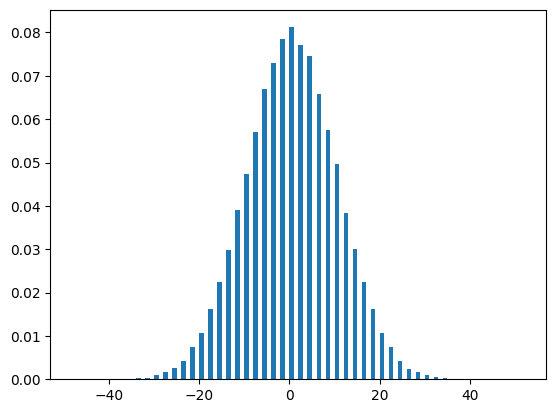

In [ ]:
N = 100000 # tirages
n = 100 # clous

xs = [simulate_bead_position_after_layers(n) for i in range(N)]

n, bins, patches = plt.hist(xs, bins=n, density=True)
plt.show()

In [ ]:
print('La valeur moyenne {:.5f}'.format(np.mean(n)))
print('La valeur variance {:.5f}'.format(np.var(n)))

La valeur moyenne 0.01000
La valeur variance 0.00046
